#  NLP Assignment 1: Part B
#  Author  : Pratik Mandlecha
##  Roll Number : 20161172

 
##  Task 1: Probability of Classes and P(Trigram | class) from training data **

## Task 2: Grammar Error Detection and Classification on Test Data.**
###      Classification into error types using Naive Bases.

In [1]:
# imports
import sys
import re
import os
from matplotlib import pyplot as plt

In [2]:
corpus_files = sorted(os.listdir('Data'))
inputdir = "./Data"
train = ""
test = ""
for i in corpus_files:
    #print(i)
    if i == 'train.txt':
        with open(inputdir + '/' + i) as file:
            train += file.read()
    if i == 'dev.txt':
        with open(inputdir + '/' + i) as file:
            test += file.read()        

In [3]:
# Creating correct and incorrect corpus correct corpus might be needed for error correction.
data = train.split('\n\n')
corp_correct = []
corp_incorrect = []
for i in data:
    j = str(i).split('\n')
    for k in j:
        g=k.split('   ')
        corp_incorrect.append(g[0])
        if len(g) == 1:
            corp_correct.append(g[0])
        else:
            # for cases like fight   fight the illness   WOinc more than 1 g addition is needed.
            corp_correct.append(g[1])

In [4]:
def get_trigrams(Words):
    trigrams = {}
    for index in range(len(Words)-2):
        pair = (Words[index],Words[index + 1], Words[index + 2])
        if pair not in trigrams:
            trigrams[pair] =0
        trigrams[pair] += 1
    return trigrams

def get_bigrams(Words):
    bigrams = {}
    for index in range(len(Words)-1):
        pair = (Words[index],Words[index + 1])
        if pair not in bigrams:
            bigrams[pair] =0
        bigrams[pair] += 1
    return bigrams

def get_unigrams(Words):
    unigrams = {}
    for index in range(len(Words)):
        pair = Words[index]
        if pair not in unigrams:
            unigrams[pair] =0
        unigrams[pair] += 1
    return unigrams

In [5]:
trigrams = get_trigrams(corp_incorrect)
bigrams = get_bigrams(corp_incorrect)
unigrams = get_unigrams(corp_incorrect)

In [6]:
# Creating 2d array of data for easy manipulations
corpus = [[0 for x in range(3)] for y in range(len(corp_correct))]
index = 0
for i in data:
    j = str(i).split('\n')
    for k in j:
        g=k.split('   ')
        corpus[index][0] = g[0]
        corpus[index][1] = -2
        corpus[index][2] = 'NoErr'
        if len(g) == 3:
            corpus[index][1] = g[1]
            corpus[index][2] = g[2]    
        index+=1    

In [7]:
# Creating 2D dictionary.
dictionary = {}

error_class = ['Vt','Vm','V0','Vform','SVA','ArtOrDet','Nn','Npos','Pform','Pref','Prep','Wci','Wa','Wform','Wtone',
               'Srun','Smod','Spar','Sfrag','Ssub','WOinc','WOadv','Trans','Mec','Rloc-','Cit','Others','Um','NoErr']
for i in error_class:
    dictionary[i]= {}

In [8]:
for i in range(len(corpus)-2):
    # d is for the pair of trigrams  
    d= [corpus[i][2],corpus[i+1][2],corpus[i+2][2]]
    d=list(set(d))
    pair = (corpus[i][0] , corpus[i+1][0], corpus[i+2][0])
    if corpus[i][2] == 'NoErr' and corpus[i+1][2] == 'NoErr' and corpus[i+2][2] == 'NoErr':
        if pair not in dictionary['NoErr']:
            dictionary['NoErr'][pair] = 0
        dictionary['NoErr'][pair] +=1
    for clas in d:
        if clas is not 'NoErr':
            if pair not in dictionary[clas]:
                dictionary[clas][pair] = 0
            dictionary[clas][pair] +=1

In [9]:
# Dictionary created
#print(dictionary['Nn'])

In [10]:
def dict_class_sum():
    clas_count={}
    for clas in error_class:
        s = 0
        for t in dictionary[clas]:
            s+=dictionary[clas][t]
        clas_count[clas]=s
    return clas_count  

In [11]:
class_tri_sum = dict_class_sum()
#print(class_tri_sum)

In [12]:
# Class wise probabilities
cls_pro = []
def class_prob():
    sum = 0
    class_pro = {}
    for clas in class_tri_sum:
        sum += class_tri_sum[clas]
    for clas in class_tri_sum:
        class_pro[clas]= float(class_tri_sum[clas]/sum)
        cls_pro.append(float(class_tri_sum[clas]/sum))
    return class_pro

In [13]:
class_probabilities = class_prob()
print(class_probabilities['NoErr'])

0.725129082780547


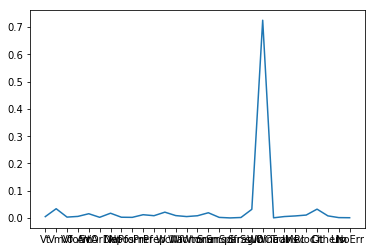

In [14]:
plt.plot(error_class,cls_pro)

In [15]:
def laplace_smoothing(tri_tup):
    bi_tup = (tri_tup[0],tri_tup[1])
    try :
        bi=float(bigrams[bi_tup])
    except: bi = 0
    try:
        tri=float(trigrams[tri_tup])
    except: tri = 0
    
    l = len(trigrams) # Number of different Trigrams in complete Corpus.
    return ((tri+1)/(bi+l))

In [16]:
# P(trigram|class) if tri not in class then laplace smoothing is used.
def pro_tri_given_class(tri,clas):
    try :
        c=dictionary[clas][tri]
    except: c = 0    
    s = class_tri_sum[clas]
    if c==0:
        c=laplace_smoothing(tri)
    return (float(c/s))

In [17]:
#print(pro_tri_given_class(('the', 'life', 'expectancy'),'NoErr'))

Now we have P(Class) , P(trigram | class)
For trigrams like 
{
genetic   -   Cit
disorder   -   Cit
,
}
The trigram will be added in (NoErr and Cit) classes only once so no repitiotion and all trigrams are taken.

Now For Testing Dataset (dev.txt)

For a word it's class identification is done as follows.
(to , better , accessibility , to , healthcare) are set of 5 words so for finding class of  accessibility

class which Max of (P(class|tri1)+P(class|tri2)+P(class|tri3)) will decide the class of accessibility.

Also if a trigram is not present in a class We apply laplace smoothing to get P(tri|class) in that class .
If trigram it self doesn't exist in training data set then P(trigram) is found by laplace smoothing.

In [18]:
# Taking test data -> data is in test
test = test.split('\n\n')
corp_test = []
for i in test:
    j = str(i).split('\n')
    for k in j:
        corp_test.append(k)

In [19]:
test_data_tri = get_trigrams(corp_test)
test_data_bi = get_bigrams(corp_test)
test_data_uni = get_unigrams(corp_test) 

In [20]:
def class_identifier():
    corp_out = [[0 for x in range(2)] for y in range(len(corp_test))]
    for i in range(len(corp_test)-2):
        maxx = 0
        cl = ''
        if i < 2:
            corp_out[i][0] = corp_test[i]
            corp_out[i][1] = 'NoErr'
        else:
            pair1 = (corp_test[i-2],corp_test[i-1],corp_test[i])
            pair2 = (corp_test[i-1],corp_test[i],corp_test[i+1])
            pair3 = (corp_test[i],corp_test[i+1],corp_test[i+2])
            for clas in error_class:
                clas_tri = (pro_tri_given_class(pair1,clas)+pro_tri_given_class(pair2,clas)+pro_tri_given_class(pair3,clas))*(class_probabilities[clas])
                if clas_tri > maxx:
                    maxx = clas_tri
                    cl = clas
                # In case of equal values select class which has more probability to come.    
                if clas_tri == maxx and class_probabilities[clas] > class_probabilities[cl]:
                    cl = clas
            corp_out[i][0] = corp_test[i]
            corp_out[i][1] = cl
    return  corp_out           

In [21]:
out = class_identifier()
out = out[:-2]

In [22]:
#print(out)

In [23]:
def get_out(A):
    s=''
    for a in A:
        s+=str(a[0])
        if (a[1])=='NoErr':
            s+='\n'
        else:
            s=s+'   '+str(a[1])+'\n'
    return s    

In [24]:
final_output = (get_out(out))

In [25]:
print(final_output)

the
life
expectancy
of
individuals   Vt
has   Um
increased
due
to
better
accessibility
to
healthcare
services
and
facilities
than
before
.
in
addition
,
a
better
health
care
system
will
allow
the
people
to
stay   Rloc-
healthier   Rloc-
and
prevent   Mec
some   Prep
major   Um
illness   Um
from
happening
like
stroke   Um
and   Nn
heart
attack
.
one
cause
for
this
is
attributed
to
the
era   Srun
of
baby
boomers
,
who
are
now   Prep
mostly
in   Wci
their   Wci
late   Wci
fifties   Um
or   Um
early   Um
sixties   Um
.   Prep
before   Prep
this   Wci
solution   Prep
was   Prep
implemented   Vform
,   Vt
they
did
a
further   Npos
study
,
and
realized
that
the
solution
will
not
work
;   Pref
as   V0
the
farmers   Vt
are   Vform
using   Prep
traditional   Prep
farming   Um
methods   Um
which
are
not
yield   Prep
efficient   Mec
.
due
to
these
problems
,
a
team
of
researchers
have   V0
created
a
system
that   Vform
makes
use
of
sensors
to   Wci
identify   Um
human   Um
actions
and   Cit
uses  

In [ ]:
sys.stdout=open("./Data/dev_results.txt","w")
print (final_output)
sys.stdout.close()